In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [4]:
# Create Dataframe

path = '/kaggle/input/lite-coin/LTC-GBP.csv Coursework.csv'

df = pd.read_csv(path)

In [5]:
# Load Dataframe

df.head()

,Date,Close
0,01/12/2018,23.914509
1,01/01/2019,24.147255
2,01/02/2019,34.857853
3,01/03/2019,46.659538
4,01/04/2019,56.979076


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Close   61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [7]:
#Set date index

df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df.set_index(['Date'])

df.head()


/tmp/ipykernel_42/2753110295.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)


,Close
Date,
2018-01-12,23.914509
2019-01-01,24.147255
2019-01-02,34.857853
2019-01-03,46.659538
2019-01-04,56.979076


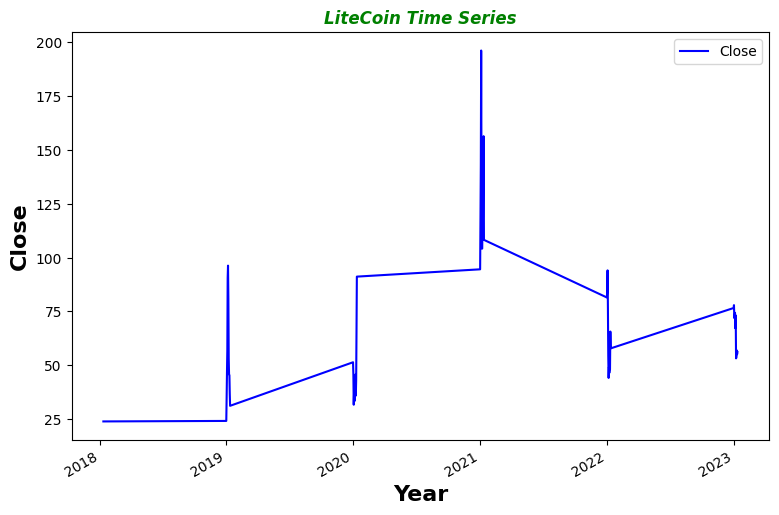

In [27]:
# Show plot 

df = df.plot(color='blue', figsize=(9,6))
df.set_xlabel('Year', color = 'black', fontsize = 16, fontweight = 'bold')
df.set_ylabel('Close', color = 'black', fontsize = 16, fontweight = 'bold')
df.set_title('LiteCoin Time Series', color = 'green',fontweight = 'bold', fontstyle = 'italic')
plt.show()

In [8]:
# Statistical Analysis

df.describe()

,Close
count,61.000000
mean,70.554507
std,35.479200
min,23.914509
25%,45.660233
50%,56.979076
75%,90.621643
max,196.263138


In [9]:
# Statistical analysis

print("mean of sample set is % s" %(statistics.mean(df.Close)))

mean of sample set is 70.554507


In [10]:
# Statistical analysis

print("Median of data-set is : % s " % (statistics.median(df.Close)))

Median of data-set is : 56.979076 


In [11]:
# Statistical analysis

print("mode of sample set is % s" %(statistics.mode (df.Close)))

mode of sample set is 23.914509


In [12]:
print("Variance of sample set is % s" %(statistics.variance(df.Close)))

Variance of sample set is 1258.7736236122566


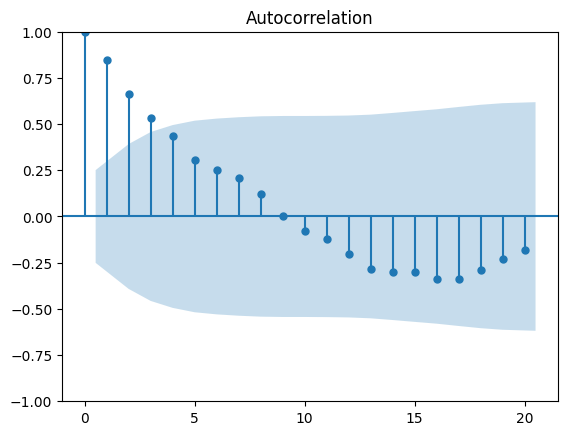

In [13]:
# Plotting Autocorrelation

from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(df['Close'], lags=20)
plt.show()

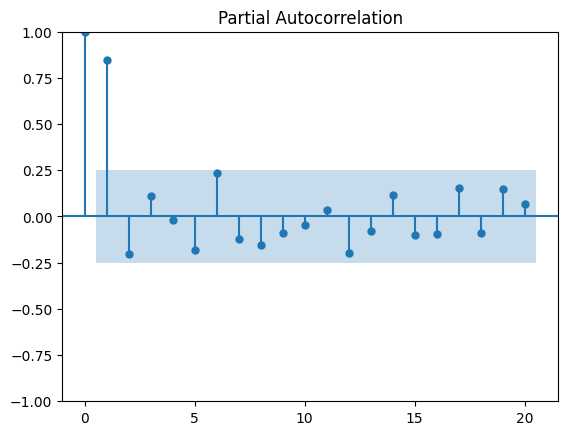

In [14]:
# Plotting Partial Autocorrelation

fig = tsaplots.plot_pacf(df['Close'], lags=20)
plt.show()

<Axes: xlabel='Date'>

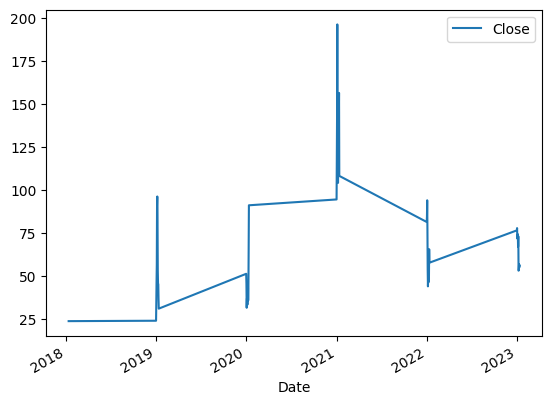

In [15]:
# Import Libraries for Seasonality, Trend and Noise Plotting
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
df.plot()

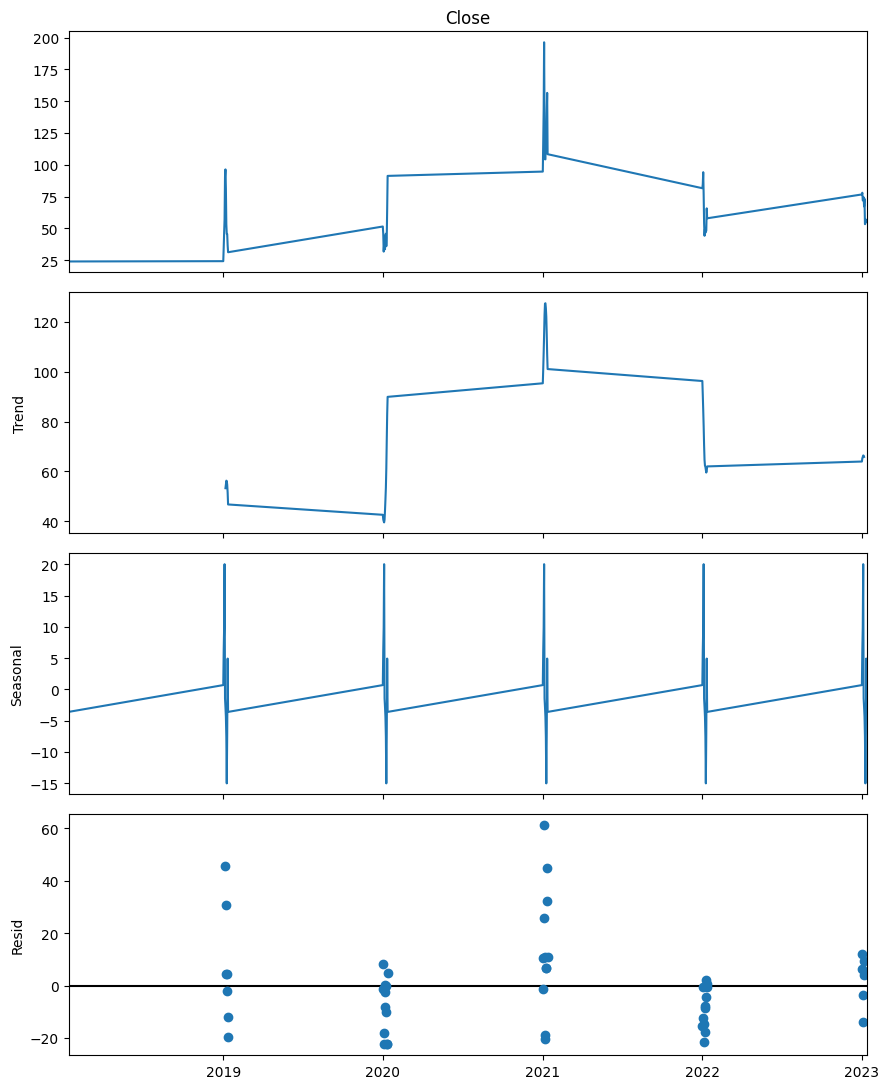

In [20]:
#Time series decomposition 

rcParams['figure.figsize'] = 9, 11  # resizing the image to be big enough 
decomposition = sm.tsa.seasonal_decompose(df['Close'], period = 12)
fig = decomposition.plot()
plt.show()

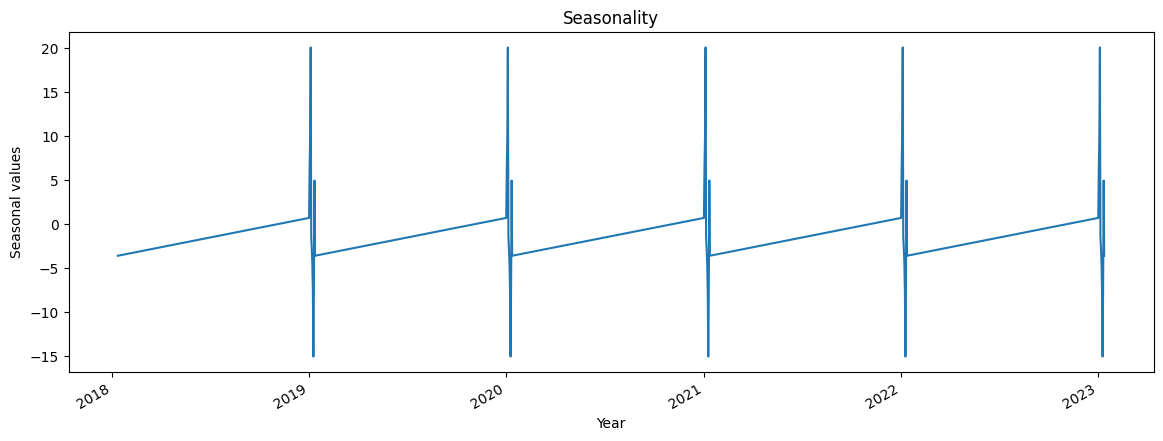

In [42]:
# Seasonality Component

decomp_seasonal = decomposition.seasonal
df = decomp_seasonal.plot(figsize=(14, 5))
df.set_xlabel('Year')
df.set_ylabel('Seasonal values')
df.set_title('Seasonality')
plt.show()

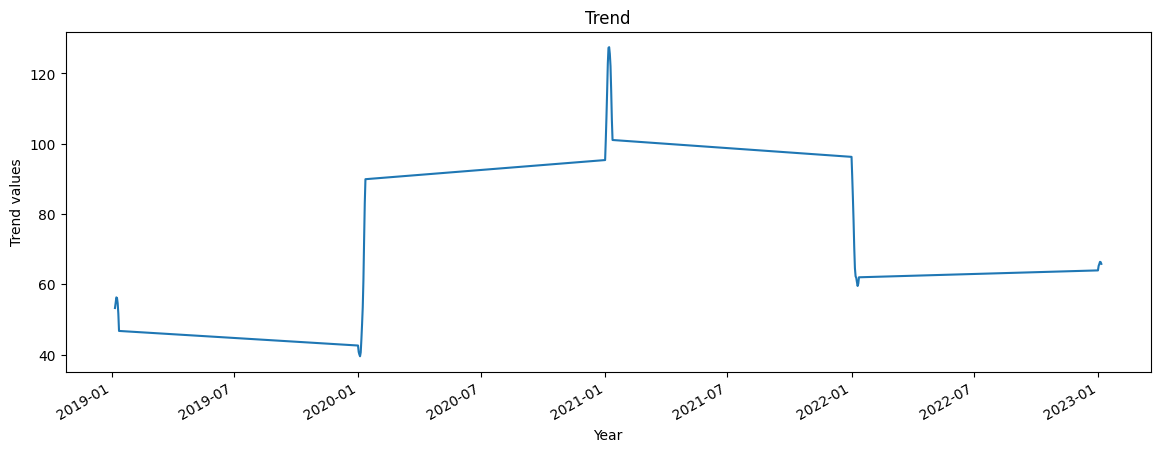

In [43]:
# Trend component

decomp_trend = decomposition.trend
df = decomp_trend.plot(figsize=(14, 5))
df.set_xlabel('Year')
df.set_ylabel('Trend values')
df.set_title('Trend')
plt.show()

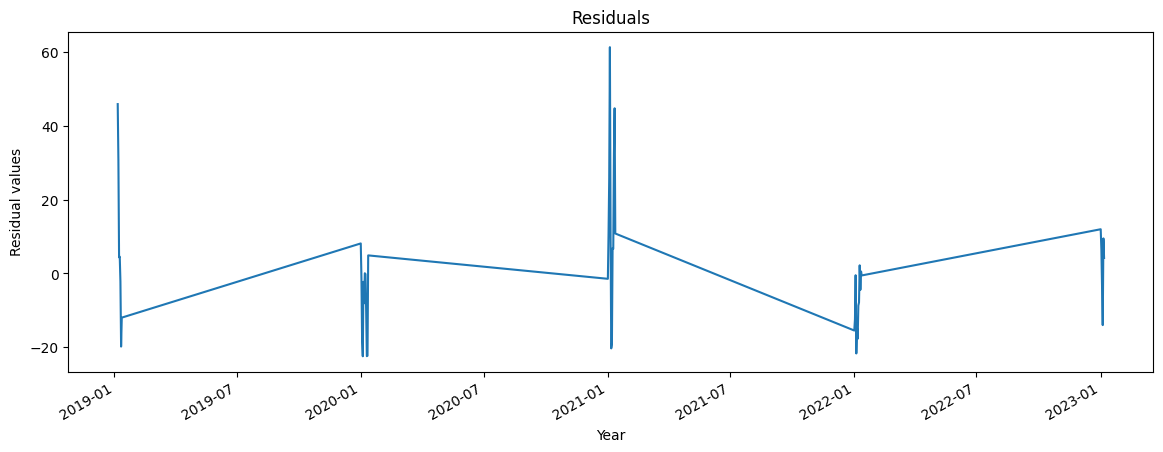

In [44]:
#Noise component

decomp_resid = decomposition.resid
df = decomp_resid.plot(figsize=(14, 5))
df.set_xlabel('Year')
df.set_ylabel('Residual values')
df.set_title('Residuals')
plt.show()

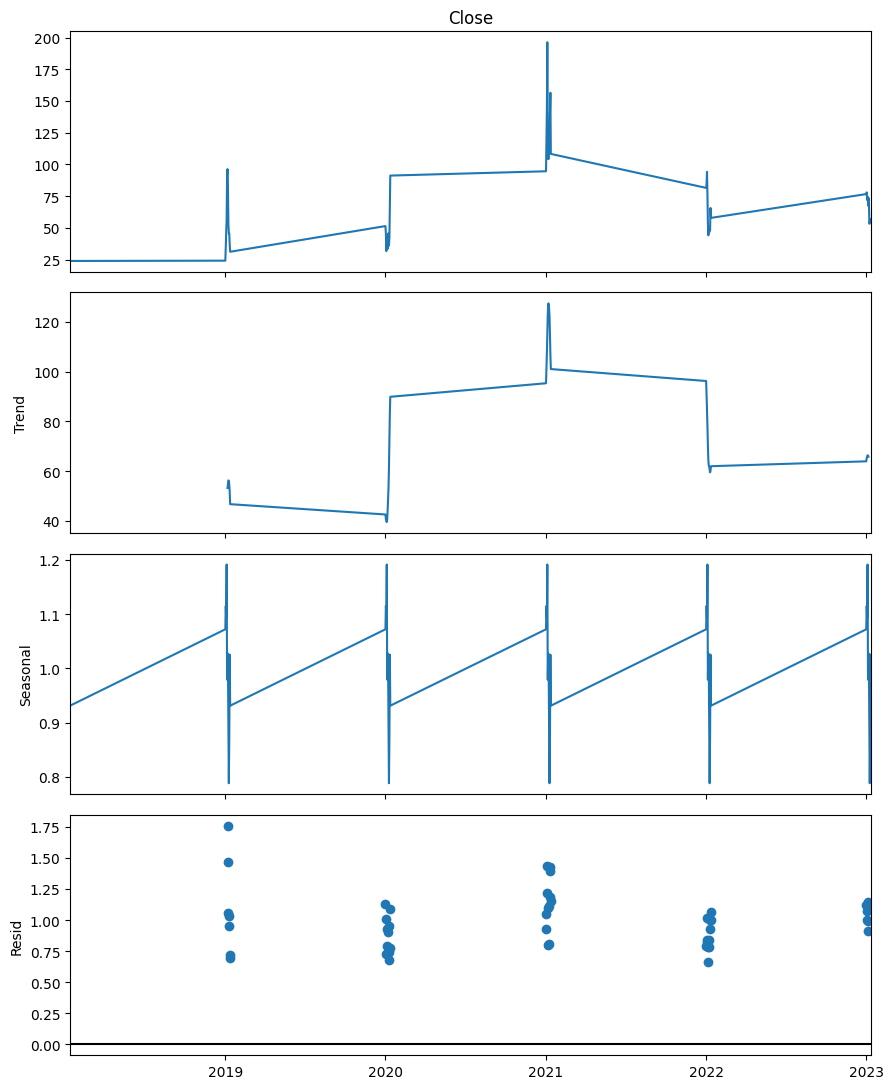

In [21]:
# Dataset Patterns

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Plot Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=12)

multiplicative_decomposition.plot()
plt.show()



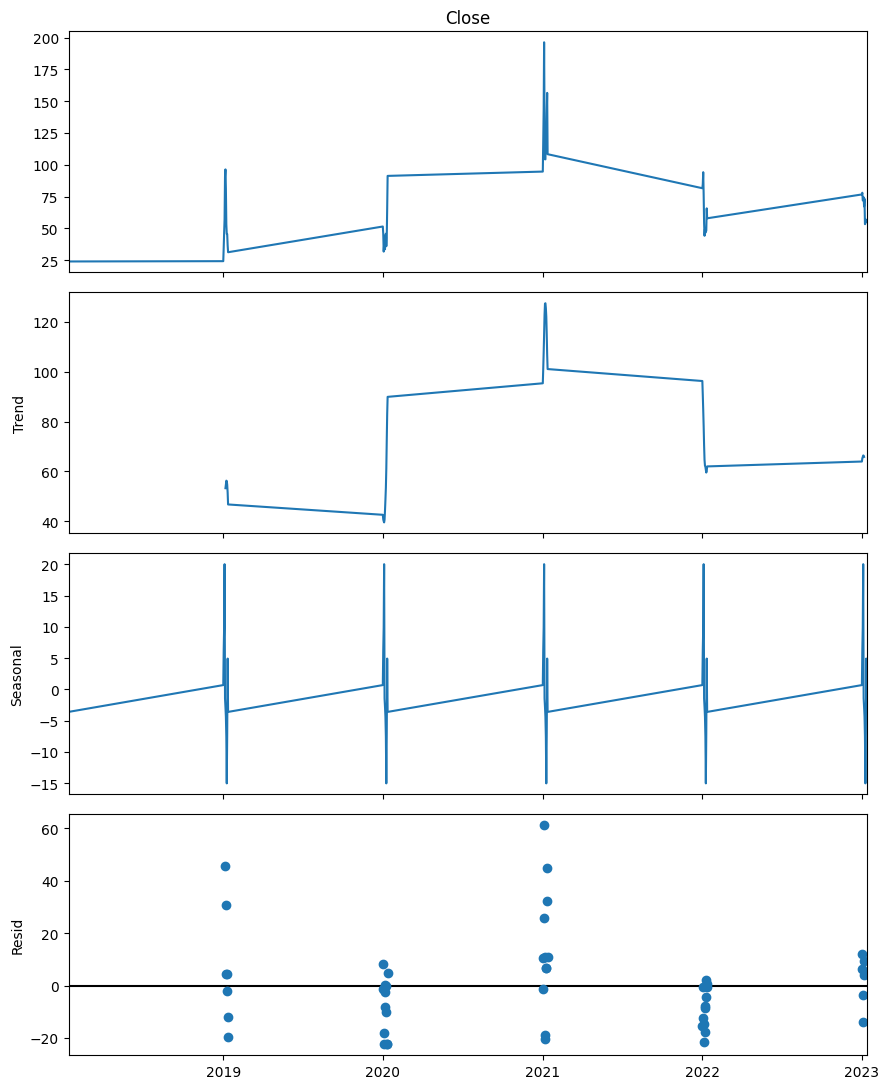

In [22]:
# Plot Additive Decomposition
additive_decomposition = seasonal_decompose(df['Close'], model='additive',period=12)

additive_decomposition.plot()
plt.show()

In [26]:
# Time Series Forecasting

# Set the number of samples for training and testing
# 80% of 61 samples
train_len = 48  

# Extract training set (80% of data)
train = df.iloc[:train_len]

# Extract test set (20% of data)
test = df.iloc[train_len:]

## Naive Method

 """
    Forecast using the Naive Method.
    
    Parameters:
        data (list): A list of historical data points.
        nforecast: number of forecasts you want to make
        
    Returns:
        forecast (list): A list of forecasts for each period.
    """

In [32]:
# Naive Method

def naive_method(data, nforecast):
   
    forecast = [data[-1]]  
    number = nforecast-1 
    
    # Create a loop To forecast the 20%:
    
    for i in range(number):
         forecast.append(forecast[-i])
    
    return forecast

In [34]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = naive_method(train['Close'], nforecast = 13)

y_hat_naive

,Close,naive_forecast
Date,,
2022-01-12,57.857685,65.669762
2023-01-01,76.620628,65.669762
2023-01-02,77.946671,65.669762
2023-01-03,71.901077,65.669762
2023-01-04,72.438255,65.669762
2023-01-05,74.380684,65.669762
2023-01-06,67.211502,65.669762
2023-01-07,73.201714,65.669762
2023-01-08,53.226807,65.669762


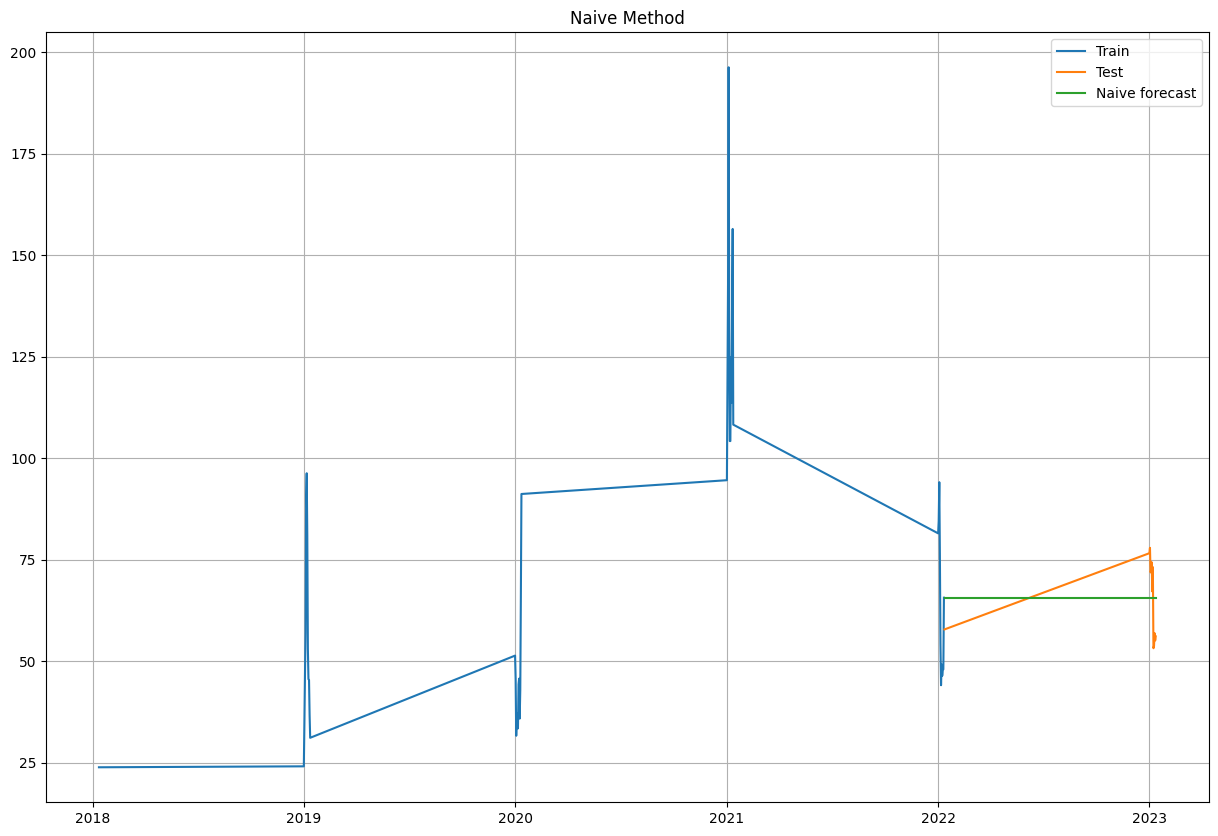

In [38]:
# Plot Train, Test and Forecast

plt.figure(figsize=(15,10), dpi = 100)
plt.grid()
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [52]:
# Accuracy Metrics 
#Get the RMSE, MAPE, MAE

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_naive['naive_forecast'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_naive['naive_forecast'])),2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Naive method,9.3,8.84,14.06


## Average Historical Data Method

"""
    Forecast using the average of all historical values Method.
    
     Parameters:
        data (list): A list of historical data points.
        nforecast: number of forecasts you want to make
        
    Returns:
        forecast (list): A list of forecasts for each period.
        
    """

In [54]:
# Average of all Historical Data Method

def average_historical_method(data, nforecast):
    
    average = sum(data) / len(data)  
    forecast = [average] * nforecast
        
    return forecast

In [55]:
y_hat_average_hist = test.copy()
y_hat_average_hist['Average_Hist_Forecast'] = average_historical_method(train['Close'], nforecast = 13)

round(y_hat_average_hist,2)

,Close,Average_Hist_Forecast
Date,,
2022-01-12,57.86,72.02
2023-01-01,76.62,72.02
2023-01-02,77.95,72.02
2023-01-03,71.90,72.02
2023-01-04,72.44,72.02
2023-01-05,74.38,72.02
2023-01-06,67.21,72.02
2023-01-07,73.20,72.02
2023-01-08,53.23,72.02


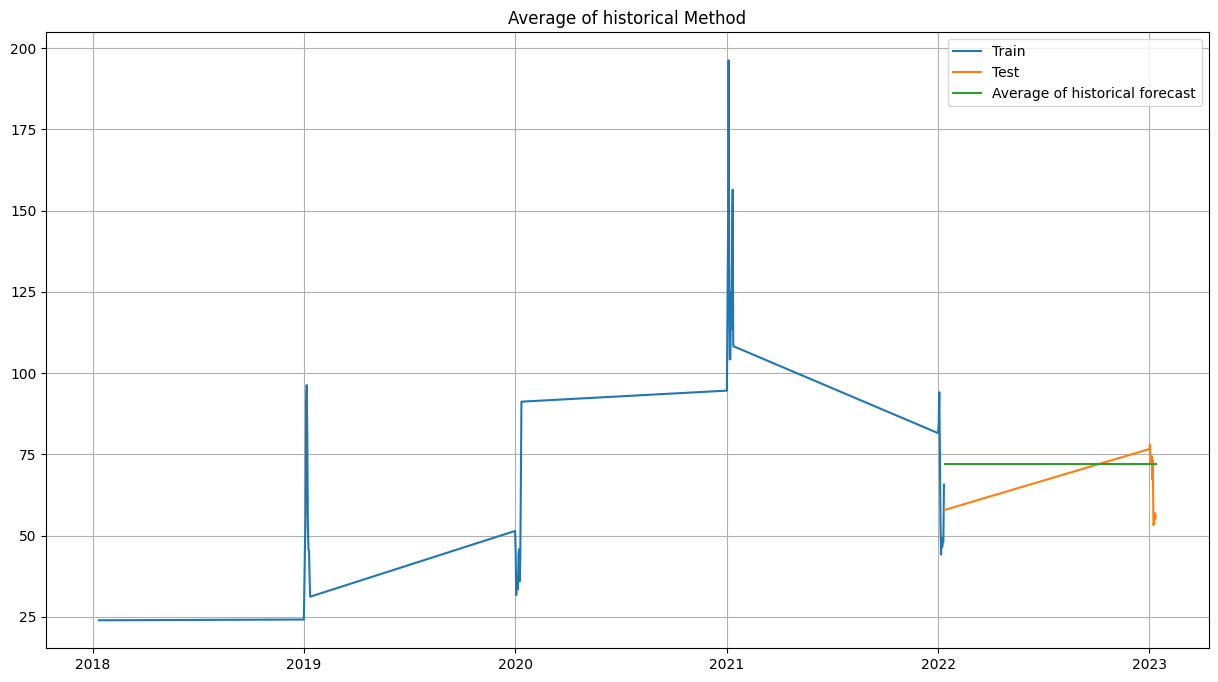

In [58]:
# Plot Train, Test and Average of all Historical Forecast

plt.figure(figsize=(15,8), dpi = 100)
plt.grid()
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_average_hist['Average_Hist_Forecast'], label='Average of historical forecast')
plt.legend(loc='best')
plt.title('Average of historical Method')
plt.show()

### Accuracy Metrics

In [59]:
# Accuracy Metrics 
#Get the RMSE, MAPE, MAE
# Compare the predictive performance of both methods using suitable accuracy metrics.

rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_average_hist['Average_Hist_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_average_hist['Average_Hist_Forecast'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_average_hist['Average_Hist_Forecast'])),2)

results = pd.DataFrame({'Method':['Average all historical Method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Average all historical Method,11.56,9.11,15.8


## Simple Average Method

In [68]:
#Calculate the predicted Value

y_hat_MA_meth = test.copy()
my_window = 12
y_hat_MA_meth['Moving_Avg_Forecast'] = train['Close'].rolling(my_window).mean().iloc[-1]

round(y_hat_MA_meth,2)

,Close,Moving_Avg_Forecast
Date,,
2022-01-12,57.86,66.71
2023-01-01,76.62,66.71
2023-01-02,77.95,66.71
2023-01-03,71.90,66.71
2023-01-04,72.44,66.71
2023-01-05,74.38,66.71
2023-01-06,67.21,66.71
2023-01-07,73.20,66.71
2023-01-08,53.23,66.71


<function matplotlib.pyplot.show(close=None, block=None)>

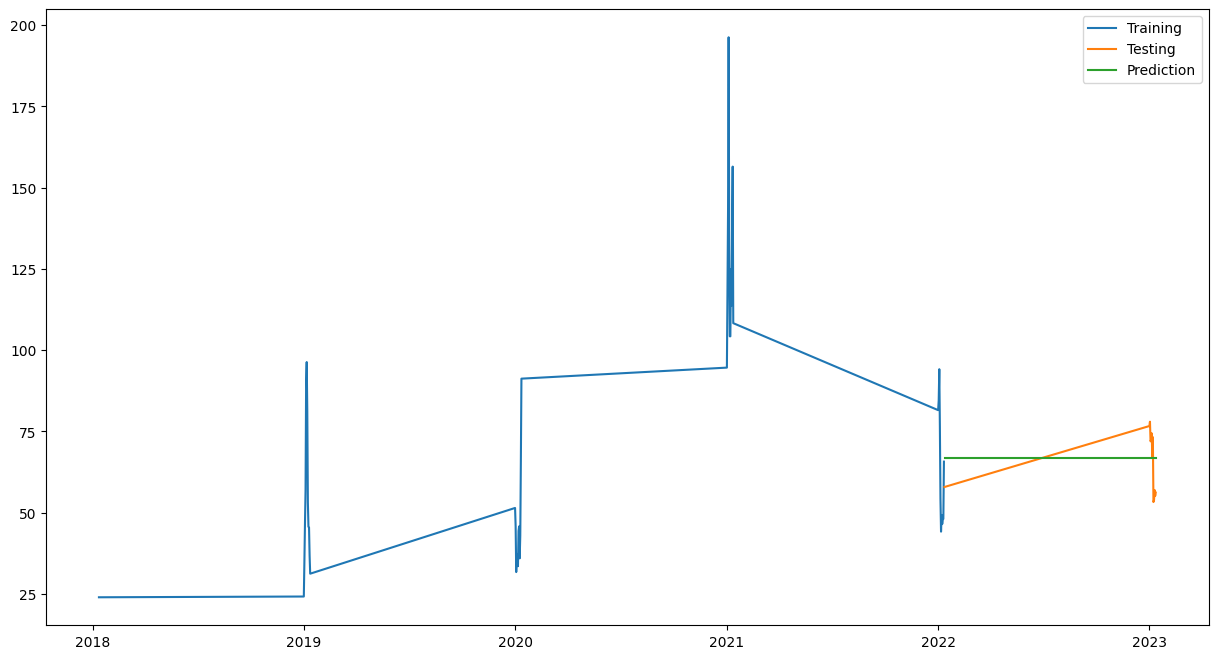

In [69]:
# Plot Train, Test and Forecast by Predicting using Simple Moving Average Method

plt.figure(figsize = (15, 8), dpi = 100)
plt.plot(train['Close'], label = 'Training')
plt.plot(test['Close'], label = 'Testing')
plt.plot(y_hat_MA_meth['Moving_Avg_Forecast'], label = 'Prediction')
plt.legend(loc = 'best')
plt.show

In [90]:
# Calculating the Error Prediction - Accuracy Determination
#Get the RMSE, MAPE, MAE

rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_MA_meth['Moving_Avg_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Close'] - y_hat_MA_meth['Moving_Avg_Forecast'])/test['Close'])*100,2)
mae = np.round(np.mean(np.abs(test['Close'] - y_hat_MA_meth['Moving_Avg_Forecast'])),2)

results = pd.DataFrame({'Method':['Simple Moving Average'], 'RMSE':[rmse], 'MAPE':[mape], 'MAE':[mae]})
results = results[['Method', 'RMSE', 'MAPE', 'MAE']]
results

,Method,RMSE,MAPE,MAE
0,Simple Moving Average,9.42,14.16,8.76


## Exponential Smoothing Method

In [92]:
# Simple or Single Exponential Smoothing Method
# Function SimpleExpSmoothing represents the method

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

alpha = 0.6

y_hat_avg = test.copy()

# Here statsmodels to automatically find an optimized value of alpha
    
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=alpha, optimized=False)

# number of forecasting equal to the test size

y_hat_avg['SES'] = fit2.forecast(len(test)) 

round(y_hat_avg,2)


,Close,SES
Date,,
2022-01-12,57.86,58.6
2023-01-01,76.62,58.6
2023-01-02,77.95,58.6
2023-01-03,71.90,58.6
2023-01-04,72.44,58.6
2023-01-05,74.38,58.6
2023-01-06,67.21,58.6
2023-01-07,73.20,58.6
2023-01-08,53.23,58.6


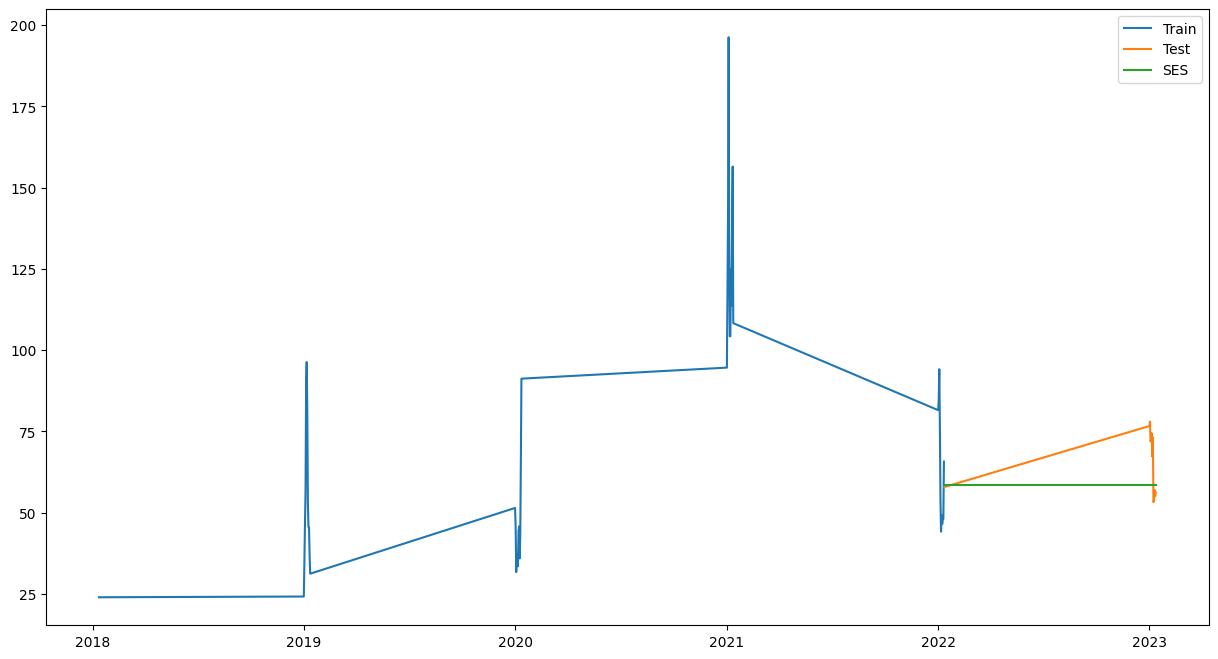

In [93]:
# Plot the Test, Train and SES

plt.figure(figsize=(15,8), dpi = 100)
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [94]:
fit2.params

{'smoothing_level': 0.6,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 23.914509,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
# Accuracy Metrics 
#Get the RMSE, MAPE, MAE

rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['SES'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['SES'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_avg['SES'])),2)

results = pd.DataFrame({'Method':['Simple Exponential Smoothing'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Simple Exponential Smoothing,11.36,9.39,13.37


## Holt's Linear Trend Method

In [96]:
#Holt's Linear Trend Method

# Here statsmodels to automatically optimize the values

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.1,smoothing_slope = 0.9)

y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

round(y_hat_avg,2)

/tmp/ipykernel_42/3867631208.py:7: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.1,smoothing_slope = 0.9)
/opt/conda/lib/python3.10/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,Close,Holt_linear
Date,,
2022-01-12,57.86,6.26
2023-01-01,76.62,11.92
2023-01-02,77.95,17.57
2023-01-03,71.90,23.22
2023-01-04,72.44,28.87
2023-01-05,74.38,34.53
2023-01-06,67.21,40.18
2023-01-07,73.20,45.83
2023-01-08,53.23,51.49


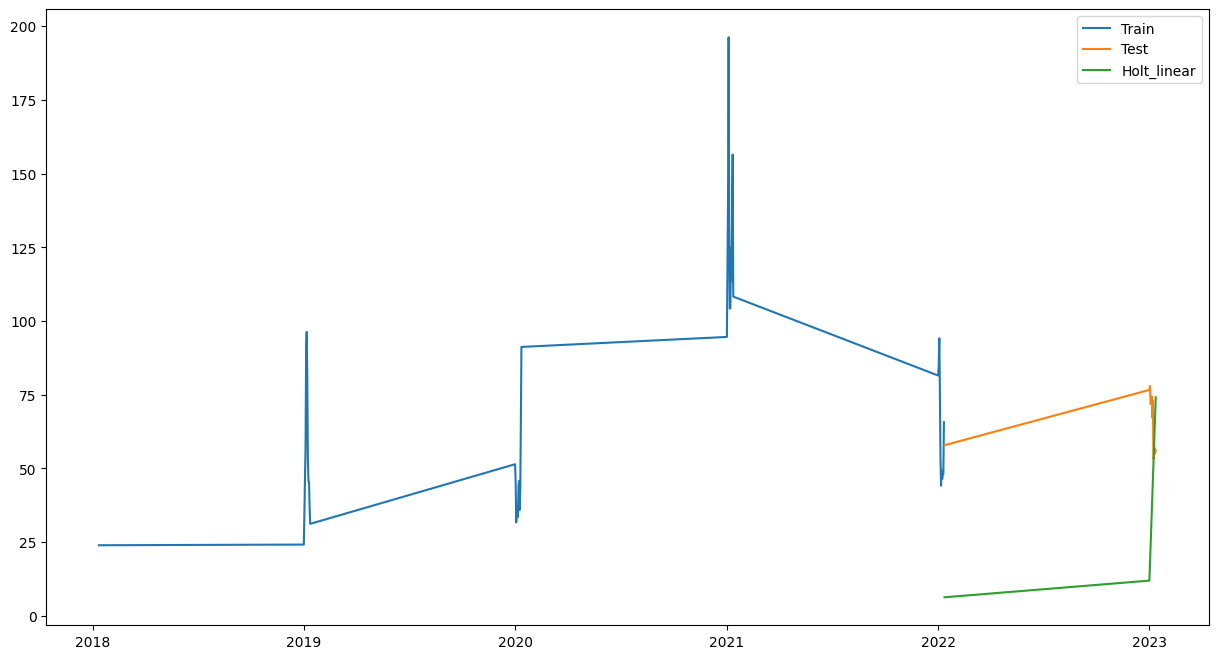

In [97]:
# Plot the Test, Train and Holt Linear

plt.figure(figsize=(15,8), dpi = 100)
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [98]:
fit1.params

{'smoothing_level': 0.1,
 'smoothing_trend': 0.9,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 23.914509,
 'initial_trend': 0.23274600000000234,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
# Accuracy Metrics 
#Get the RMSE, MAPE, MAE

rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['Holt_linear'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_linear'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_linear'])),2)

results = pd.DataFrame({'Method':['Holt Linear'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Linear,37.6,31.18,45.08


## Holt-Winters Method

In [100]:
# Holt_Winters Method
# Statmodels to show trend and seasonal multiplicative

y_hat_avg = test.copy()
fit3 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()

y_hat_avg['Holt_Winter'] = fit3.forecast(len(test))

round(y_hat_avg,2)

,Close,Holt_Winter
Date,,
2022-01-12,57.86,56.27
2023-01-01,76.62,55.54
2023-01-02,77.95,63.41
2023-01-03,71.90,71.56
2023-01-04,72.44,84.34
2023-01-05,74.38,71.11
2023-01-06,67.21,62.16
2023-01-07,73.20,62.32
2023-01-08,53.23,60.12


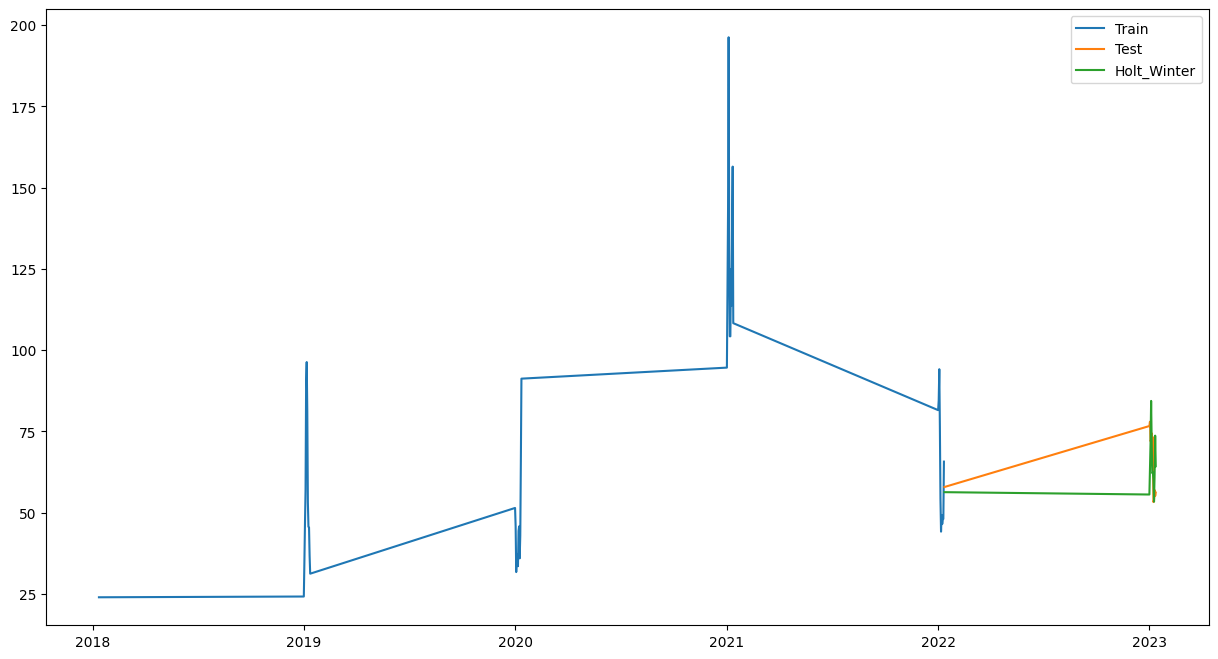

In [101]:
# Plot the Test, Train and Holt-Winter

plt.figure(figsize=(15,8), dpi = 100)
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [102]:
fit3.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 1.7274861790914932e-10,
 'damping_trend': nan,
 'initial_level': 30.397754378003363,
 'initial_trend': 0.6655558846293106,
 'initial_seasons': array([ -7.18480364,  -8.57325727,  -1.36865111,   6.115173  ,
         18.23219058,   4.33648293,  -5.28131142,  -5.79239459,
         -8.65396439, -16.11317116,  -8.4048164 ,   2.88515834]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
# Accuracy Metrics 
#Get the RMSE, MAPE, MAE

rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['Holt_Winter'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_Winter'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_Winter'])),2)

results = pd.DataFrame({'Method':['Holt Winter'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Winter,10.5,8.26,12.52


## Dick Fuller Test

In [106]:
#import library and run ADF Statistic
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.Close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.278535
p-value: 0.178984


Since P-Value (0.178984) is greater than the significance (0.05)
We difference the series and see how the autocorrellation plot looks like

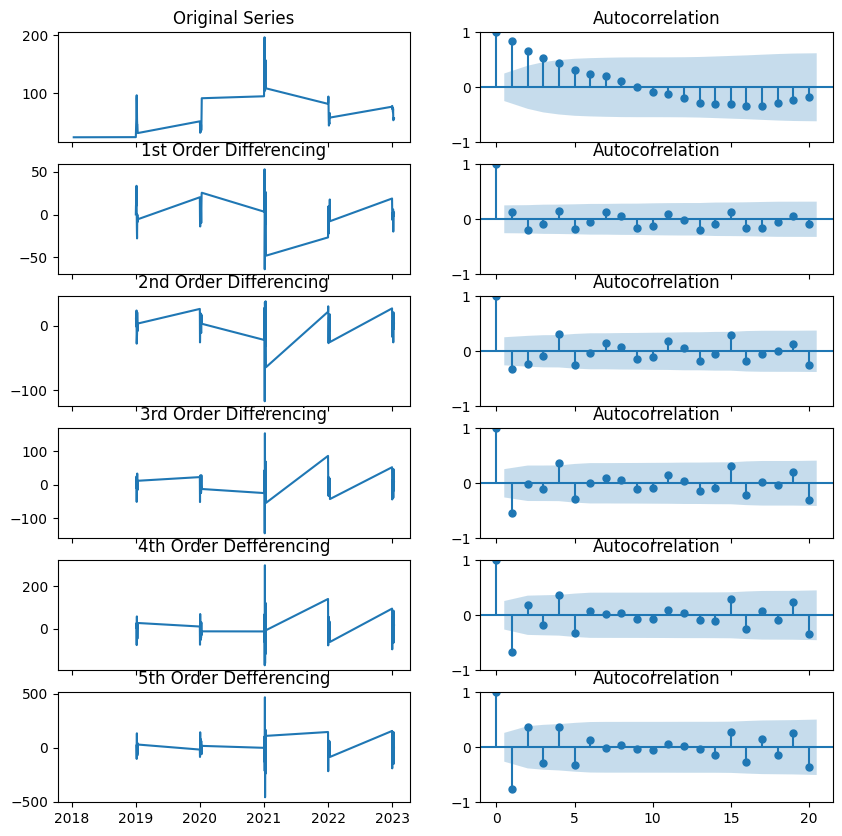

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(10,10), 'figure.dpi':100})


# Original Series
fig, axes = plt.subplots(6, 2, sharex='col')
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, lags = 20, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), lags = 20, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), lags = 20, ax=axes[2, 1])

# 3rd Differencing
axes[3,0].plot(df.Close.diff().diff().diff()); axes[3,0].set_title('3rd Order Differencing')
plot_acf(df.Close.diff().diff().diff().dropna(), lags = 20, ax=axes[3,1])

# 4th Differencing
axes[4,0].plot(df.Close.diff().diff().diff().diff()); axes[4,0].set_title('4th Order Defferencing')
plot_acf(df.Close.diff().diff().diff().diff().dropna(), lags = 20, ax=axes[4,1])

# 5th Differencing
axes[5,0].plot(df.Close.diff().diff().diff().diff().diff()); axes[5,0].set_title('5th Order Defferencing')
plot_acf(df.Close.diff().diff().diff().diff().diff().dropna(), lags = 20, ax=axes[5,1])

plt.show()

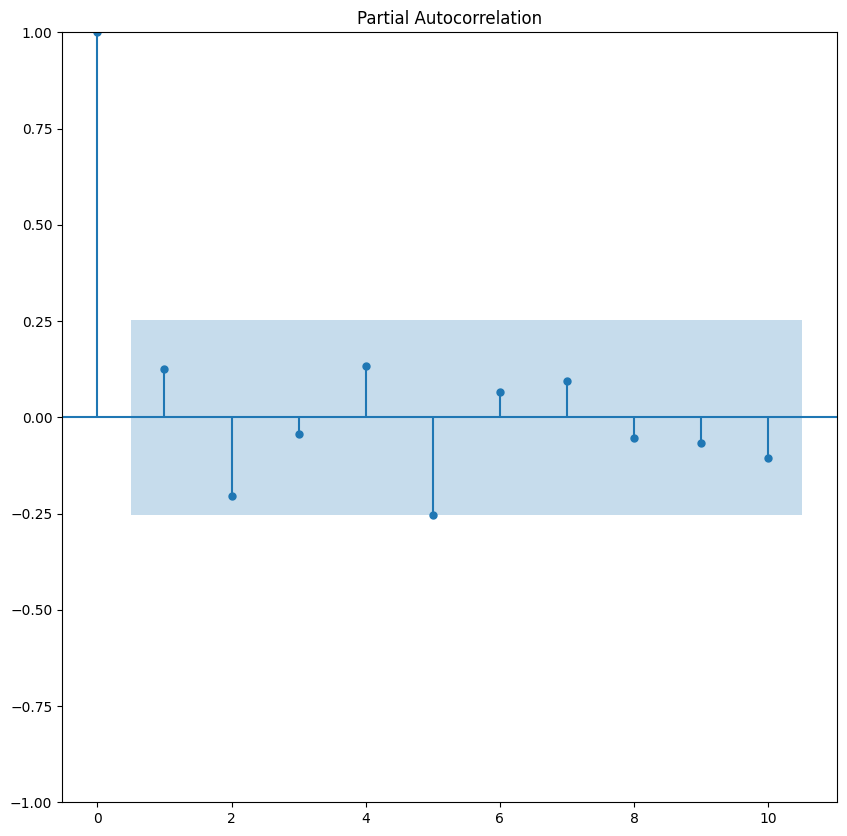

In [121]:
# PACF plot of 1st differenced series
plot_pacf(df.Close.diff().dropna(), lags=10)

plt.show()

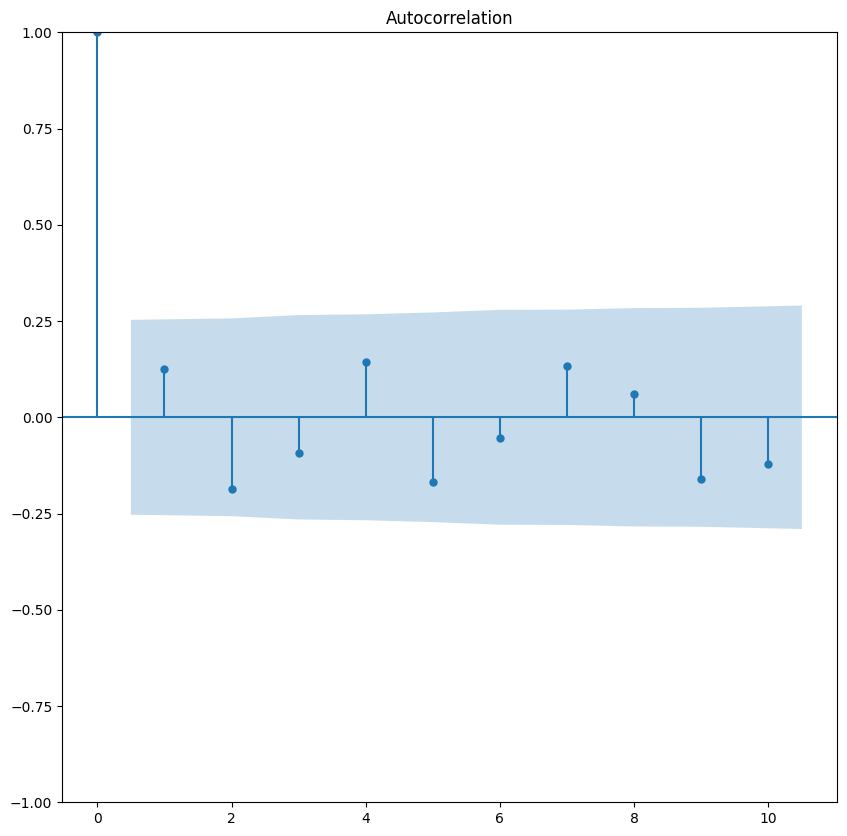

In [122]:
# ACF plot of 1st differenced series
plot_acf(df.Close.diff().dropna(), lags = 10)

plt.show()

In [134]:
# Build the ARIMA Model

from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(df.Close, order=(1,1,1)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -259.395
Date:                Wed, 31 Jan 2024   AIC                            524.790
Time:                        12:51:09   BIC                            531.073
Sample:                             0   HQIC                           527.247
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1967      0.657     -0.299      0.765      -1.485       1.091
ma.L1          0.3630      0.659      0.551      0.582      -0.928       1.654
sigma2       332.9737     46.372      7.181      0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


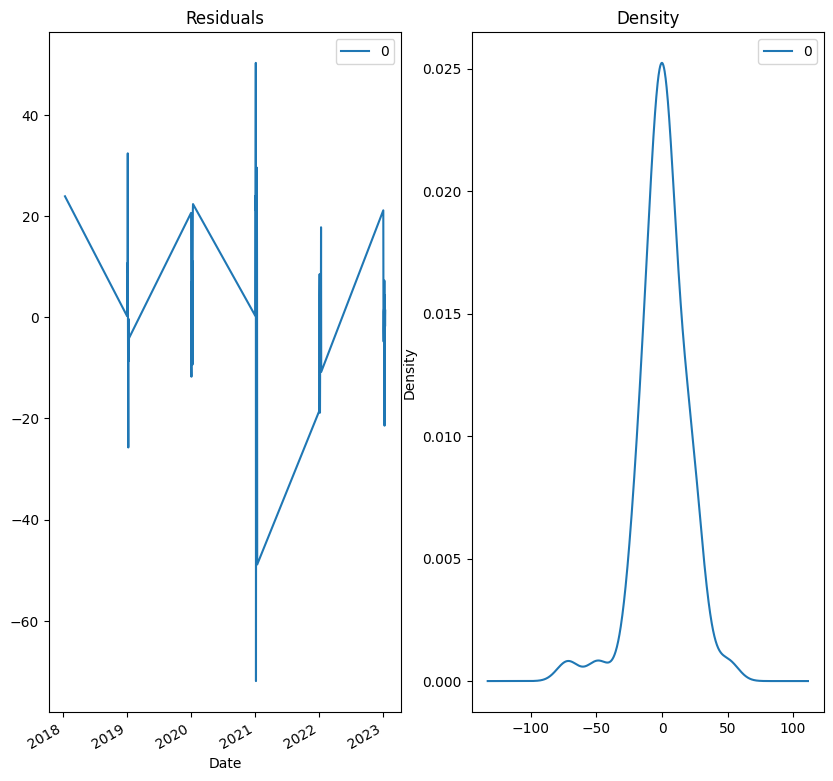

In [135]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [130]:
# 1,1,2 ARIMA Model
model = ARIMA(df.Close, order = (1,1,2)) 
#model = ARIMA(df.Close, order = (1,1,3))
model_fit = model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   61
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -257.879
Date:                Wed, 31 Jan 2024   AIC                            523.759
Time:                        12:49:49   BIC                            532.136
Sample:                             0   HQIC                           527.036
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8289      0.163      5.080      0.000       0.509       1.149
ma.L1         -0.7452     11.211     -0.066      0.947     -22.718      21.227
ma.L2         -0.2545      2.710     -0.094      0.9

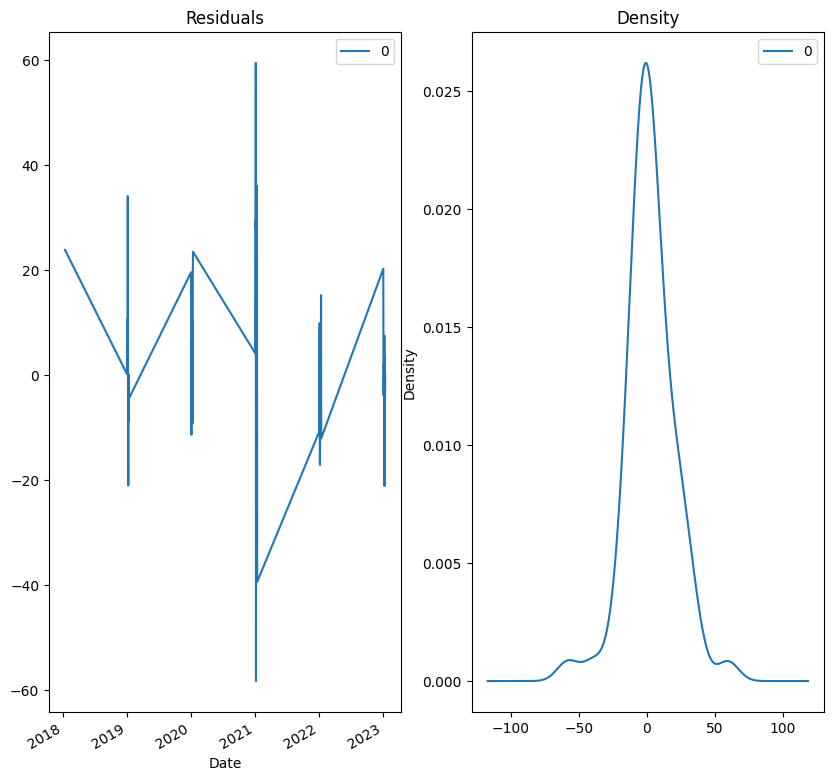

In [131]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [132]:
# 1,1,3 ARIMA Model 
model = ARIMA(df.Close, order = (1,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   61
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -256.424
Date:                Wed, 31 Jan 2024   AIC                            522.847
Time:                        12:50:43   BIC                            533.319
Sample:                             0   HQIC                           526.944
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4520      0.382     -1.184      0.236      -1.200       0.296
ma.L1          0.6736      0.337      1.998      0.046       0.013       1.334
ma.L2         -0.0561      0.180     -0.312      0.7

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


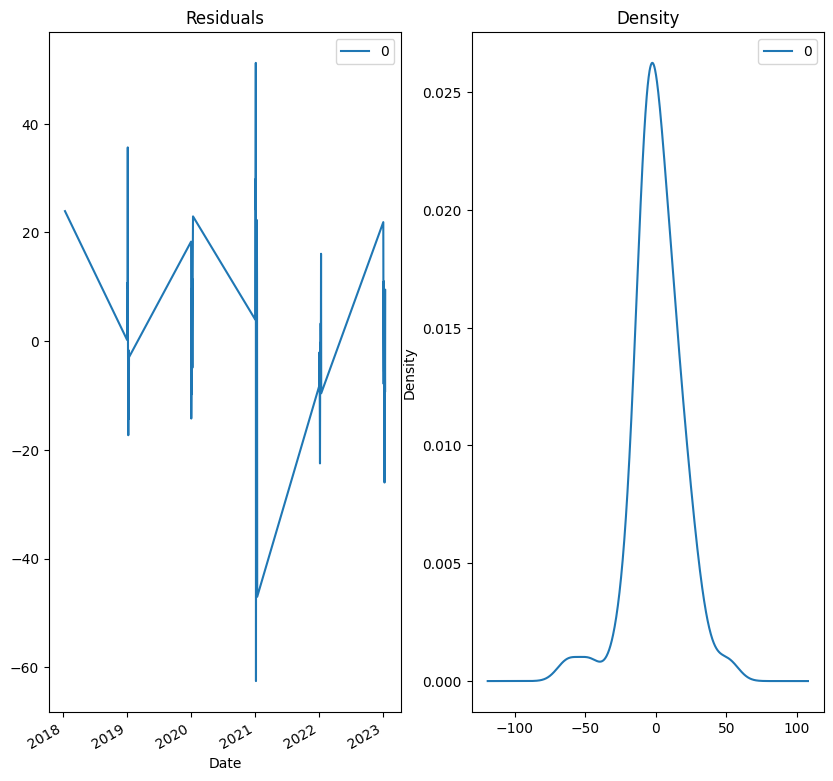

In [133]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [137]:
# Evaluate ARIMA Model 

total = len(df)
aaa = 12
hist = total - aaa

In [139]:
from statsmodels.tsa.stattools import acf

total = len(df)
num_obs_ahead = 12 # 12 months
dif = total - num_obs_ahead

# Create Training and Test
train = df.Close[:dif]
test = df.Close[dif:]

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/p

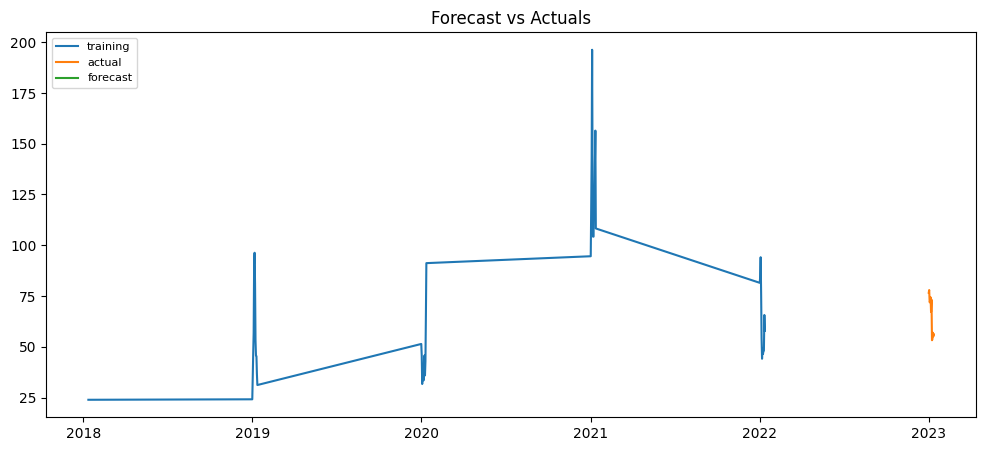

In [140]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  


# Forecast
fc = fitted.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [141]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc.values, test.values)

{'mape': 0.15231332983315912,
 'me': -10.399735183839985,
 'mae': 11.063370209656654,
 'mpe': -0.1399236997913115,
 'rmse': 14.054260961140438,
 'acf1': nan,
 'corr': -0.2752234351965313,
 'minmax': 0.15211066488671554}

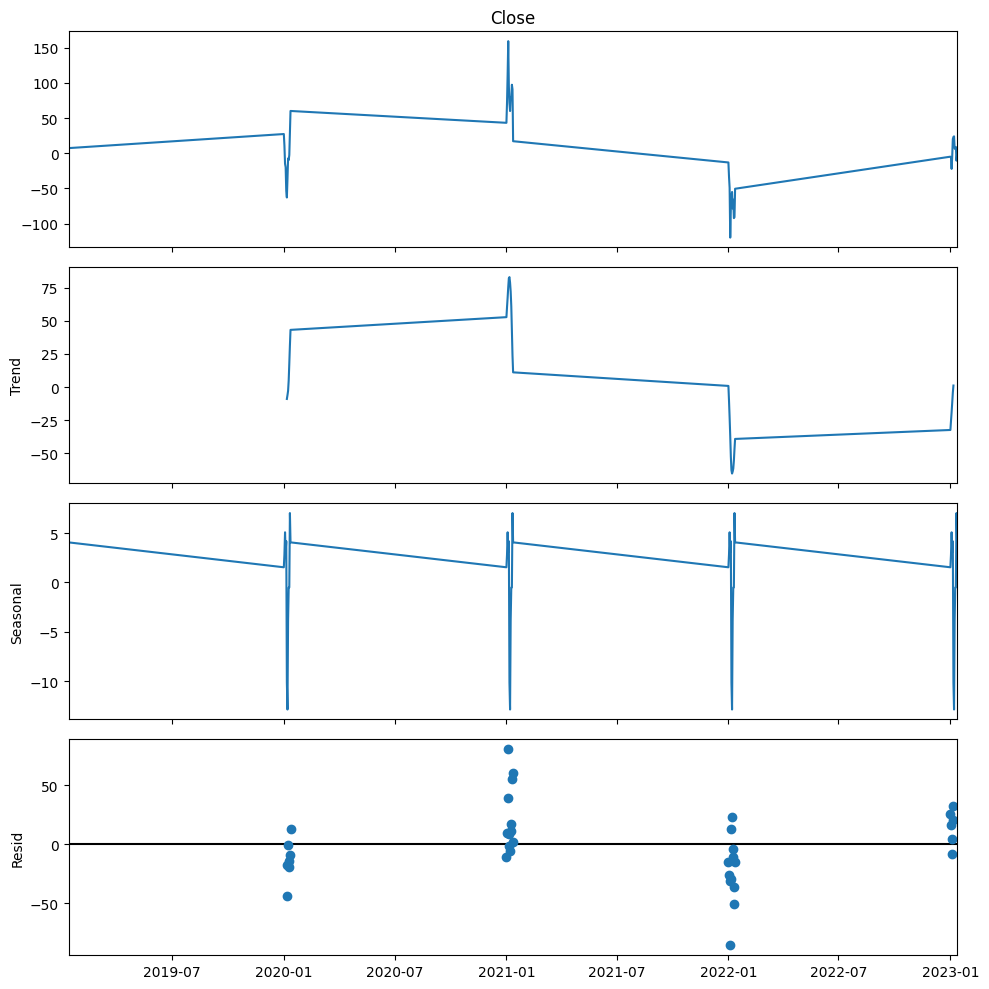

In [143]:
import statsmodels.api as sm
#import statsmodels.tsa.api as smt

data_diff_seas = df.Close.diff(12).dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 12)
dec.plot()
plt.show()

In [149]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX(df.Close, order=(1,1,1), seasonal_order=(1,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71354D+00    |proj g|=  2.19522D-01

At iterate    5    f=  3.64341D+00    |proj g|=  1.59396D-02

At iterate   10    f=  3.60450D+00    |proj g|=  8.14746D-02

At iterate   15    f=  3.58447D+00    |proj g|=  2.92657D-03

At iterate   20    f=  3.58443D+00    |proj g|=  1.66949D-04

At iterate   25    f=  3.58436D+00    |proj g|=  3.32669D-03

At iterate   30    f=  3.58432D+00    |proj g|=  2.45772D-04

At iterate   35    f=  3.58431D+00    |proj g|=  9.16049D-05

At iterate   40    f=  3.58431D+00    |proj g|=  6.23809D-05

At iterate   45    f=  3.58431D+00    |proj g|=  4.88620D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

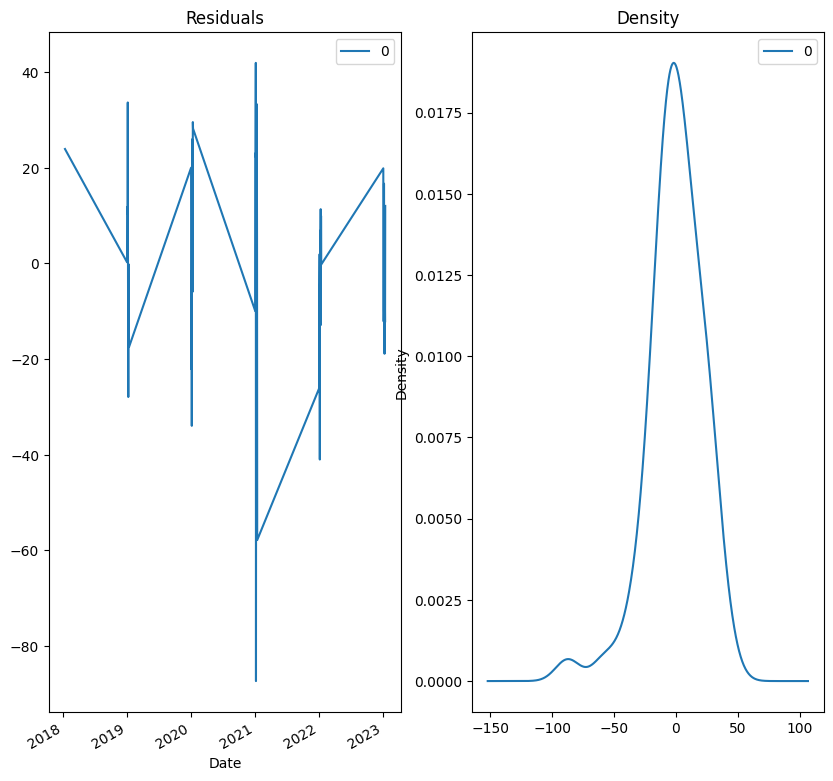

In [150]:
# Plot residual errors
residuals_sar = pd.DataFrame(modsar_fit.resid)
fig, ax = plt.subplots(1,2)
residuals_sar.plot(title="Residuals", ax=ax[0])
residuals_sar.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

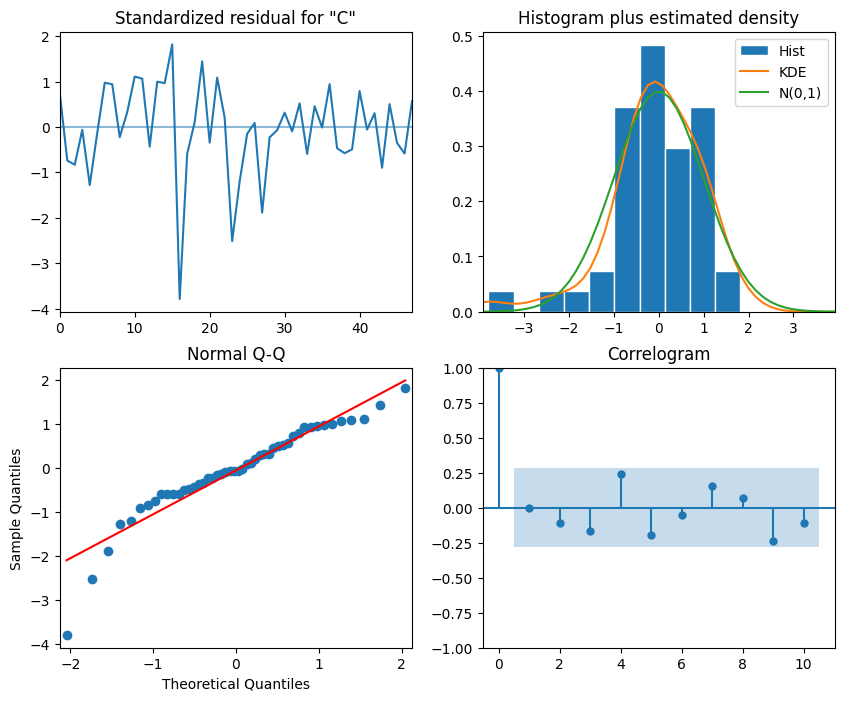

In [151]:
modsar_fit.plot_diagnostics(figsize=(10,8))
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observat

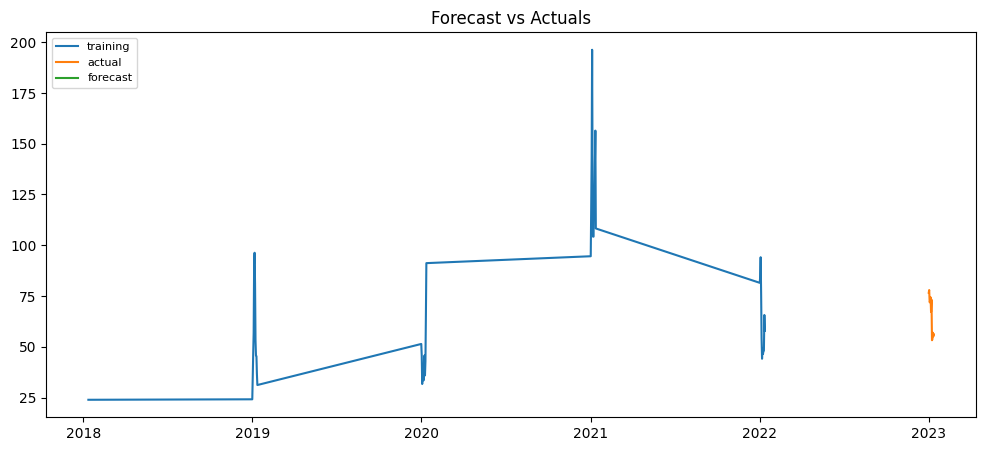

In [153]:
# Build the SARIMA model
modsar = ARIMA(train, order=(1, 1, 1), seasonal_order=(1,1,1,12))  
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [154]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.13053339611569179,
 'me': -0.8072408434194399,
 'mae': 8.656415410069,
 'mpe': 0.003557040452397397,
 'rmse': 10.657593953888432,
 'acf1': nan,
 'corr': 0.27150539384499184,
 'minmax': 0.11941606713064623}

In [146]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX(df.Close, order=(1,1,1), seasonal_order=(0,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72676D+00    |proj g|=  2.56280D-01

At iterate    5    f=  3.64209D+00    |proj g|=  1.00133D-02

At iterate   10    f=  3.58530D+00    |proj g|=  1.48258D-02

At iterate   15    f=  3.58479D+00    |proj g|=  6.89576D-03

At iterate   20    f=  3.58437D+00    |proj g|=  1.96944D-03

At iterate   25    f=  3.58432D+00    |proj g|=  5.71523D-04

At iterate   30    f=  3.58431D+00    |proj g|=  2.38892D-05

At iterate   35    f=  3.58431D+00    |proj g|=  4.29849D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [147]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX(df.Close, order=(1,1,1), seasonal_order=(0,0,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25519D+00    |proj g|=  3.90294D-02

At iterate    5    f=  4.25321D+00    |proj g|=  7.45021D-03

At iterate   10    f=  4.25242D+00    |proj g|=  5.67003D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   7.957D-06   4.252D+00
  F =   4.2523745401513304     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                  

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [148]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX(df.Close, order=(1,1,1), seasonal_order=(0,0,0,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25409D+00    |proj g|=  3.21653D-02

At iterate    5    f=  4.25320D+00    |proj g|=  1.05942D-02

At iterate   10    f=  4.25246D+00    |proj g|=  1.15758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   2.612D-06   4.252D+00
  F =   4.2523747000143111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                        

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
